# A/B Testing, Statistical *Power*, Effect Size, and Error
![](https://memegenerator.net/img/instances/78132960.jpg)

## Learning objectives:

After today, you'll be able to...
- Explain how A/B Testing is used within Data Science
- Visualize and explain effect size in python
- Conduct power analysis in python
- Explain what power and power analysis are in context  
- Explain type I and type II error in specific context
- Complete a case study of A/B Testing

# What is A/B Testing?  How do data scientists use it?

Read the article [A Refresher on A/B Testing](https://hbr.org/2017/06/a-refresher-on-ab-testing) and discuss the following with your classmates:

- What are other terms that might be used to describe A/B testing?
    - hypothesis testing
    - randomised control trials
- What types of questions can A/B testing be used to answer?
    - What effect does a variable have
- What is critical in A/B testing?
    - Proper randomisation 
- How does A/B testing relate to hypothesis testing that we discussed yesterday?
- What mistakes are commonly made when A/B testing?
    - Not letting the experiment run it's course/stopping experiment too soon

## Scenario

Suppose you were on the team that was running a pilot study with Instagram and wanted to **examine if a new feature** (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer attracted more likes given other variables are being held constant. You have collected two datasets.

<img src='./img/white-heart.png' width = 200><img src='./img/red_heart.jpeg' width =200>

## Effect Size
Effect size is used to quantify the **size of the difference between two groups under observation**. Effect sizes are easy to calculate, understand and apply to any measured outcome and is applicable to a multitude of study domains. It is highly valuable towards quantifying the effectiveness of a particular intervention, relative to some comparison. 

Measuring effect size allows scientists to go beyond the obvious and simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?'.

### Where does gender have a larger effect?

<img src="./img/gender_ES.png" style="width:500px;">

### Effect size and perspective 

Calculating effect size on your experiment put things in perspectives for you - in the context of your experiment, you are more likely to learn why and how you achieved significant conclusions as a result of effect size. 

For example, if you performed an A/B test on examining whether changing the like button on instagram resulted in people pressing more likes, you want to be cautious on the effect size of the samples you are comparing. 

### Specifically, knowing the effect size helps you with:

- **Communicate practical significance** of results. An effect might be statistically significant, but does it matter in practical scenarios ?

- Effect size calculation and interpretation allows you to draw **Meta-Analytical conclusions**. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tor effect size of the population.

- Perform **Power Analysis** , which help determine the number of participants (sample size) that a study would require to achieve a certain probability of finding a true effect - if there is one.

### Example
Compare effect size of gender in height

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower

warnings.filterwarnings("ignore")
np.random.seed(10)

In [2]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = stats.norm(male_mean, male_sd)

female_mean = 163
female_sd = 7.3
female_height = stats.norm(female_mean, female_sd)


In [3]:
def evaluate_pdf(rv, x=4):
    '''
    Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''

    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)

    # Calculate the peak of normal distribution i.e. probability density.
    ys = rv.pdf(xs)

    return xs, ys

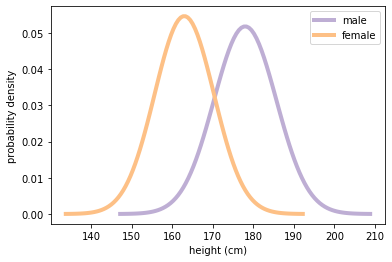

In [4]:
# Male height
xs, ys = evaluate_pdf(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_pdf(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.ylabel('probability density')
plt.legend()
plt.show()

### Cohen's $d$, standardized metrics for effect size
Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the **magnitude of differences between two (or more) groups on a given variable**, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = effect size (difference of means) / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma pooled}$

The power is __not__ the same as $d$, but it is dependent on the expected t value,represented by $\delta$, calculated by:

$\delta = $d$\sqrt \frac{n}{2}$

We can then use the power table to find the power

In [5]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (var1 +  var2) / (2)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [6]:
np.random.seed(10)

female_sample = female_height.rvs(1000)
male_sample = male_height.rvs(1000)

effect = cohen_d(male_sample, female_sample)
print(effect)

2.0676221865254156


#### Evaluating Effect Size

[good demo here](https://rpsychologist.com/d3/cohend/)

Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

In [7]:
def plot_pdfs(cohen_d):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_pdf(group1)
    plt.fill_between(xs, ys, label='Female', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_pdf(group2)
    plt.fill_between(xs, ys, label='Male', color='#376cb0', alpha=0.7)
    plt.legend()

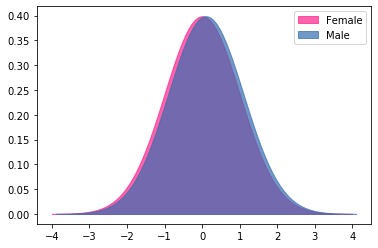

In [12]:
plot_pdfs(0.1)

##  Error
When conducting hypothesis testing, we __choose__ a value for alpha, which represents the margin of error we are allowing. Remember, alpha represents the probability in which we are allowed to take the risk of falsely rejecting the null hypothesis. By convention, we set the alpha at 0.05, which we can interpret as "for 5% of the time, we are willing to reject the null hypothesis when it is in fact true". How, then, do we categorize different types of error associated with conducting the experiments?

#### Type I error
Type I error is usually represented as $\alpha$, which is the **probability of rejecting the null hypothesis when it is in fact true.** 

For example, if we compare the height of males and females in a sample, with $\mu$m = 175cm, $\sigma$m = 4cm, and $\mu$f = 170 cm, $\sigma$f = 2.5cm, the __null hypothesis__ would be: there is no difference of heights in two genders. After conducting the appropriate statistical testing and attaining an alpha of .04, we conclude that there is a significant difference in gender. However, the reality is there is no difference. 

#### Type II Error
Type II error is represented as $\beta$, it is the **probability of failing to reject the null when it is in fact false.** Applying to our case above, we would have said that the two genders do not differ in heights when they in fact do.

##  Power
How does statistical power relate to two types of error? Power is defined as the __probability of rejecting the null hypothesis, given the condition of a specific alternative hypothesis.__

<img src="./img/decisions.png" alt="Drawing" style="width: 600px;">

__<center>Power visualized </center>__

<img src="https://dataz4s.com/wp-content/uploads/2020/04/05.-Statistical-power-calculation-bell-curves-visualization.jpg" style="width:500px;">

Relevance of Power?
- Low Statistical Power: Large risk of committing Type II errors, e.g. a false negative.
- High Statistical Power: Small risk of committing Type II errors.

Elements that affect power:
- Effect Size
- Sample Size (and thus Standard Error)
- Alpha

[Another Visualization](https://rpsychologist.com/d3/nhst/)

how does sample size affect power?

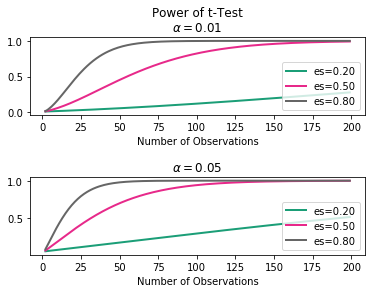

In [13]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.8)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')

ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 


### What is the formula for calculating power?

Power is usually complex to calculate, but with the help of computers and tables, we can calculate the $\delta$, or expected t value, and find out the values for power.

Examples of power tables:
- [full power table](http://www.pilesofvariance.com/Chapter13/Cohen_Power_Tables.pdf)

How you might see one in a journal:

![imgpower](http://www.ijaweb.org/articles/2016/60/9/images/IndianJAnaesth_2016_60_9_652_190621_t1.jpg)

## A/B Test Case Study 1
Suppose you are launching a pilot study with Instagram and you want to examine the new feature (making the heart when you "like" someone's photo red instead of white) developed by the frontend engineer, attracted more likes __given__ other variables are being held constant. You have collected two datasets from each of your two groups 

In [14]:
experiment = pd.read_csv('ig_experiment.csv')
control = pd.read_csv('ig_control.csv')

### Look at the data

In [15]:
experiment.head()

,ID_Exp,Likes_Given_Exp
0,1,47
1,2,54
2,3,52
3,4,54
4,5,45


In [16]:
control.head()

,ID_Con,Likes_Given_Con
0,1,59
1,2,50
2,3,55
3,4,52
4,5,59


#### Solve for sample size

We can use `TTestIndPower.solve_power` from `statsmodels` to find the sample size you need.

[documentation here](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [20]:
# before we even start the experiment, we want to know in order to attain a power of .8 given an alpha of .05,
# how many observations we need 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

25.52457250047935

In [21]:
print(experiment.shape)
print(control.shape)

(35, 2)
(35, 2)


Luckily, we do have enough observations to conduct this experiment!

In [22]:
# conducting a T Test
stats.ttest_ind(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])

Ttest_indResult(statistic=-4.151776346992102, pvalue=9.403361597139248e-05)

Visualize the effect size of the study 

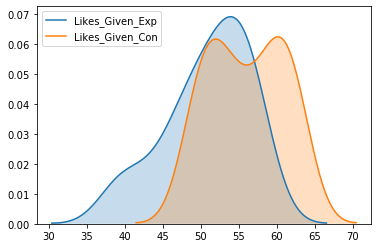

In [23]:
sns.kdeplot(experiment['Likes_Given_Exp'], shade = True)
sns.kdeplot(control['Likes_Given_Con'], shade = True)

Calculate Cohen's d to Examine the Observed Effect Size

In [24]:
cohen_d(control['Likes_Given_Con'], experiment['Likes_Given_Exp'])

0.9924643738965597

https://clincalc.com/Stats/Power.aspx

- What is an implication of having such high power in this context?
- What would be type I error in this context?
- What would be type II error in this context?

## A/B Case Study 2

### Your turn!!

You are a data scientist who is working at Udacity.  They want to see if a new form asking how many hours the student is willing to commit to the course a week will have an effect on the enrollment of students in the course.  The goal with this popup form was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn’t have enough time.

However, what Udacity wants to avoid is “significantly” reducing the number of students that continue past the free trial and eventually complete the course.

![](https://www.business-science.io/assets/2019-03-11-ab-testing/experiment_screenshot.png)

They have randomly selected some students to get the form (experimental group) and some to not get the form(control group) and collected data on various metrics each day.

#### Your task:

1. Conduct a power analysis to determine the sample size needed to conduct this experiment. 
    - You want to attain a power of .9 given an alpha of .05.  Past tests that are similar to this one have had an effect size of .55
    
2. Determine if you have enough data needed.

3. Conduct the t-test using the data to determine if there is a significant difference in the enrollments of those who got the form and those who did not.

4. Calculate your observed effect size


In [35]:
control = pd.read_csv('control_data.csv',index_col=0)
exper = pd.read_csv('experiment_data.csv', index_col=0)

In [36]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [37]:
exper.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [38]:
effect_size = 0.55
alpha = 0.05 # significance level
power = 0.9

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

70.44489517826499

In [28]:
print(control.shape, exper.shape)

(37, 6) (37, 6)


In [40]:
stats.ttest_ind(exper['Enrollments'],control['Enrollments'])

Ttest_indResult(statistic=-2.4561889182577246, pvalue=0.016455062496508358)

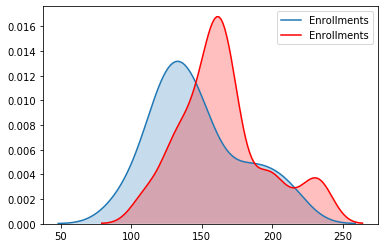

In [44]:
sns.kdeplot(exper['Enrollments'], shade = True)
sns.kdeplot(control['Enrollments'], shade = True, color = 'red');

In [48]:
d=cohen_d(control['Enrollments'], exper['Enrollments'])

In [54]:
delta = d *((37/2)**0.5)
delta

2.4561889182577246

In [53]:
d

0.5710523241123925

## Additional Resources

[Effect Sizes](https://docs.google.com/spreadsheets/d/1dqbPqj3VfiHC3oZE4azLypiFOQaeoj9HQ8Z5yjOvybs/edit#gid=0)

[Different Effect Size Measures and Calculators](https://www.psychometrica.de/effect_size.html)

[An interesting paper on effect size- Especially check the section:  Calculation of Sample Size Example](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/)

[An comprehensive discussion of effect size](https://machinelearningmastery.com/effect-size-measures-in-python/)

[Wiki for list of different available effect size measures](https://en.wikipedia.org/wiki/Effect_size)